 # Import libraries and data

In [1]:
#standard imports
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import scipy.stats as stats
#data viz imports
import matplotlib.pyplot as plt
import seaborn as sns

#for loop to read data
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
#read data sources as dataframes
train_df = pd.read_csv("/kaggle/input/titanic/train.csv")
test_df = pd.read_csv("/kaggle/input/titanic/test.csv")
gensub_df = pd.read_csv("/kaggle/input/titanic/gender_submission.csv")
#display three dfs
display(train_df.head(2), test_df.head(2), gensub_df.head(2))


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


,PassengerId,Survived
0,892,0
1,893,1


In [3]:
#inspect missing data 
print(f"Training data contains {train_df.isna().sum().sum()} missing data")
print(f"Testing data contains {test_df.isna().sum().sum()} missing data")
print(f"Gender submission data contains {gensub_df.isna().sum().sum()} missing data")

Training data contains 866 missing data
Testing data contains 414 missing data
Gender submission data contains 0 missing data


In [4]:
#inspect dupliate data 
print(f"Training data contains {train_df.duplicated().sum()} duplicate data")
print(f"Testing data contains {test_df.duplicated().sum()} duplicate data")
print(f"Gender submission data contains {gensub_df.duplicated().sum()} duplicate data")

Training data contains 0 duplicate data
Testing data contains 0 duplicate data
Gender submission data contains 0 duplicate data


# Exploratory data analysis

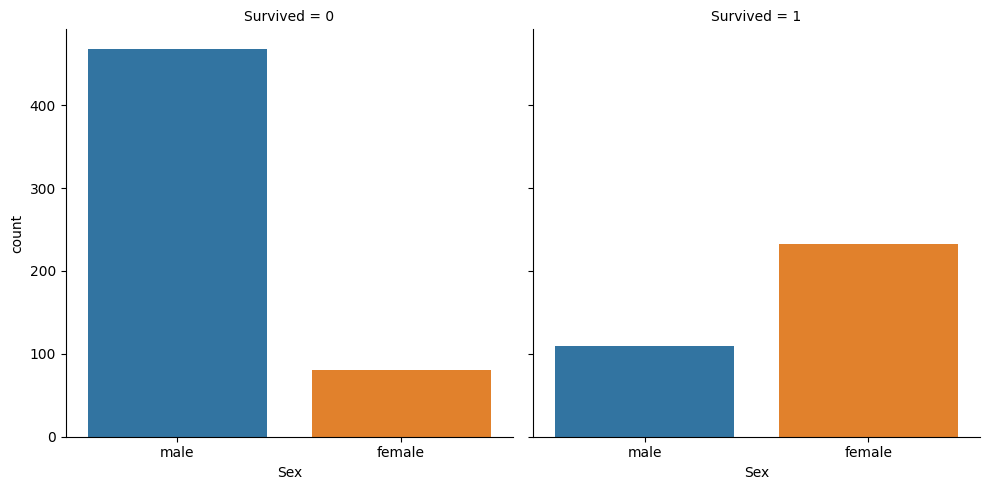

In [5]:
#call sns catplot
sns.catplot(x="Sex", data=train_df, kind="count", col="Survived")
#show plot
plt.show()

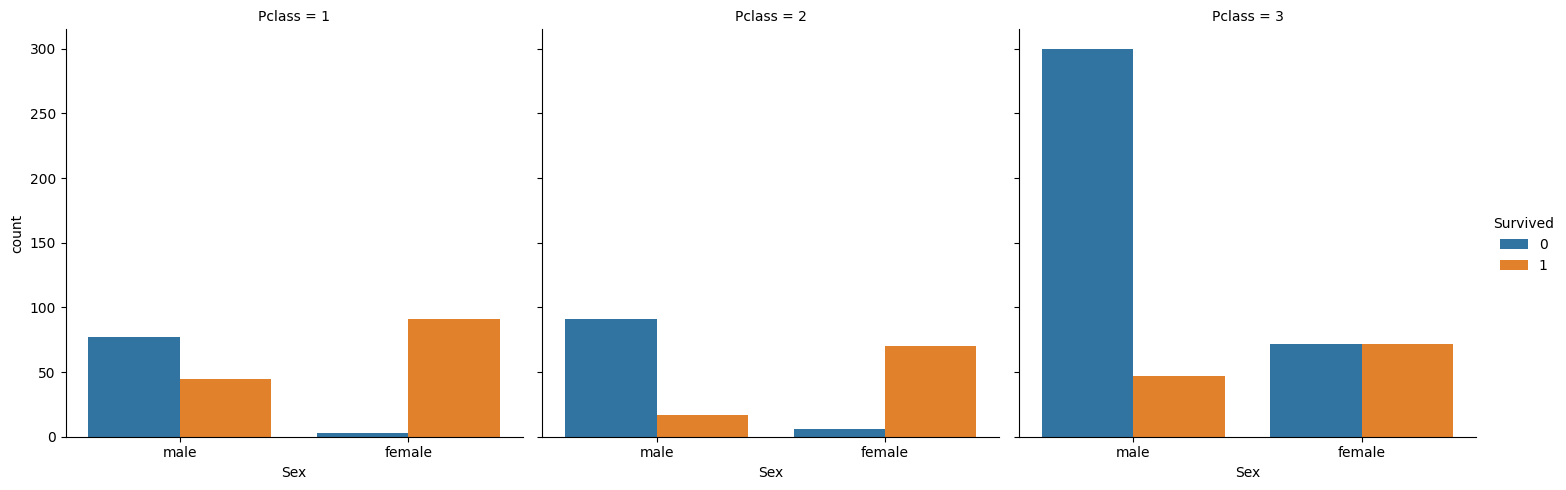

In [6]:
#call sns catplot
sns.catplot(x='Sex', data=train_df, kind='count',hue='Survived', col='Pclass')
#show plot
plt.show()

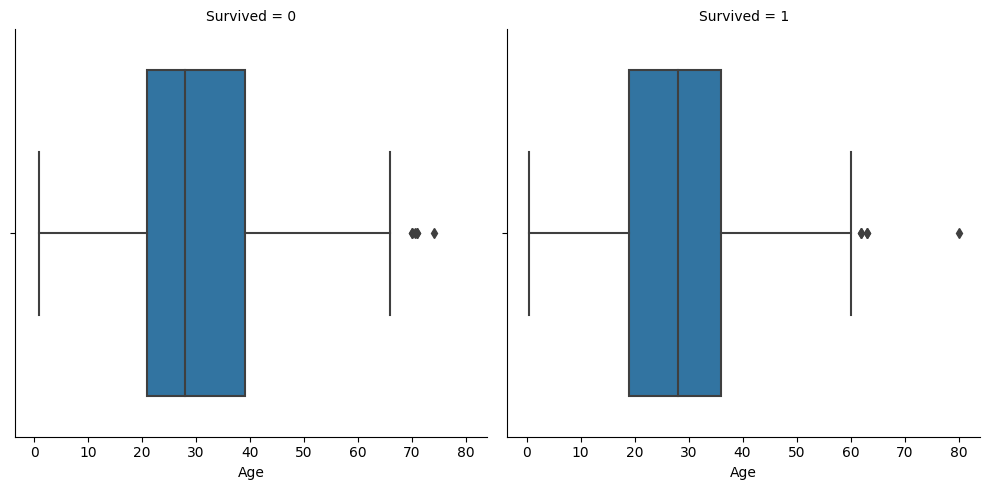

In [7]:
#call sns cat plot
sns.catplot(x='Age', kind='box', data=train_df, col='Survived')
#show plot
plt.show()

In [8]:
#filter by survived feature
survived_df = train_df[train_df['Survived']==1]
dead_df = train_df[train_df['Survived']==0]
#inspect dataframes
display(survived_df.head(2), dead_df.head(2))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S


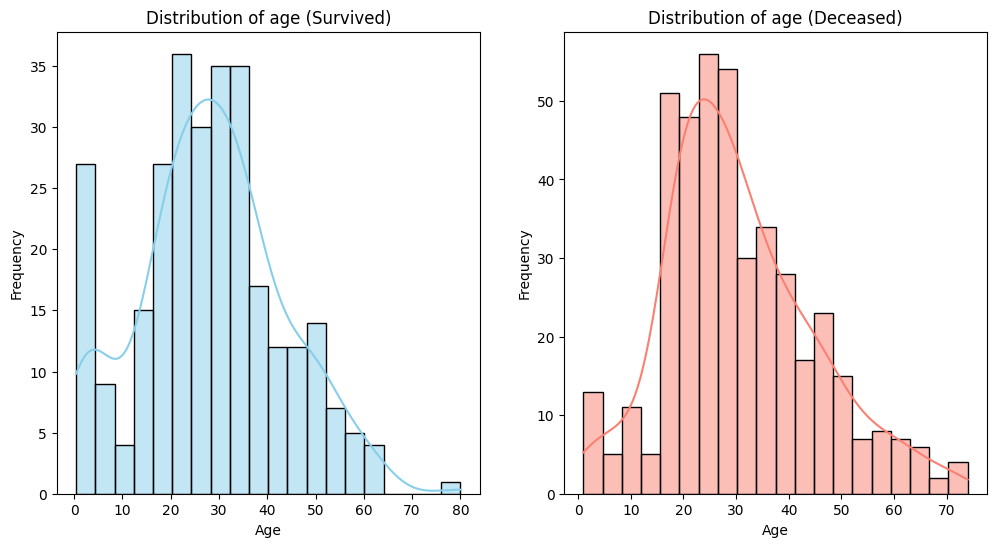

In [9]:
#create histograms for ages 
plt.figure(figsize=(12, 6))
#histogram for ages who survived 
plt.subplot(1, 2, 1)
sns.histplot(survived_df['Age'].dropna(), bins=20, color='skyblue', kde=True)
#call plot title
plt.title('Distribution of age (Survived)')
#call axis labels 
plt.xlabel('Age')
plt.ylabel('Frequency')
#histogram for ages who survived 
plt.subplot(1, 2, 2)
sns.histplot(dead_df['Age'].dropna(), bins=20, color='salmon', kde=True)
#call plot title
plt.title('Distribution of age (Deceased)')
#call axis labels 
plt.xlabel('Age')
plt.ylabel('Frequency')
#show plot
plt.show()

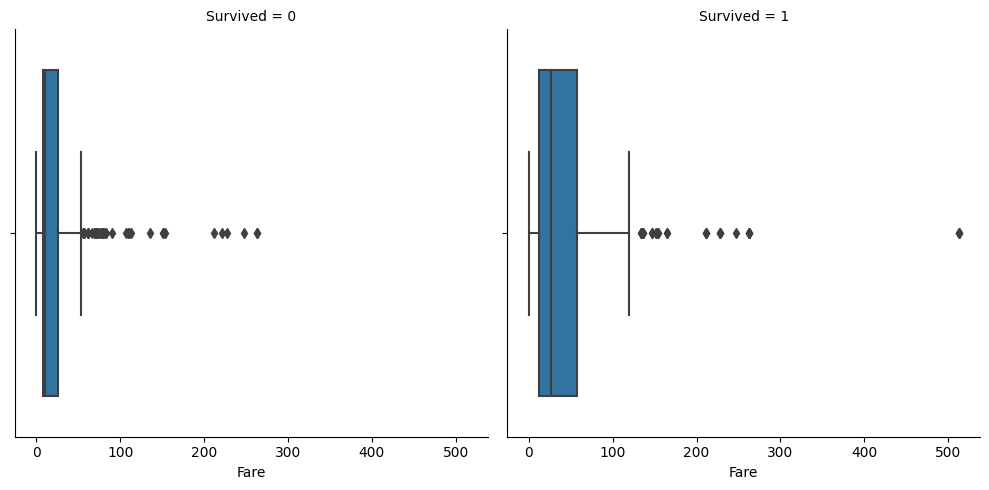

In [10]:
#call sns cat plot
sns.catplot(x='Fare', kind='box', data=train_df, col='Survived')
#show plot
plt.show()

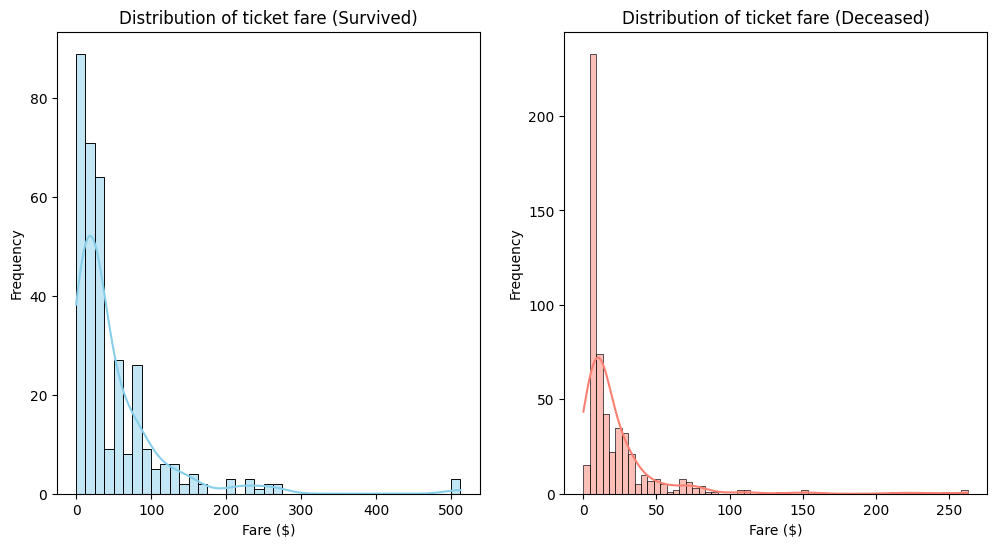

In [11]:
#create histograms for ages 
plt.figure(figsize=(12, 6))
#histogram for fare who survived 
plt.subplot(1, 2, 1)
sns.histplot(survived_df['Fare'].dropna(), bins='auto', color='skyblue', kde=True)
#call plot title
plt.title('Distribution of ticket fare (Survived)')
#call axis labels 
plt.xlabel('Fare ($)')
plt.ylabel('Frequency')
#histogram for ages who survived 
plt.subplot(1, 2, 2)
sns.histplot(dead_df['Fare'].dropna(), bins='auto', color='salmon', kde=True)
#call plot title
plt.title('Distribution of ticket fare (Deceased)')
#call axis labels 
plt.xlabel('Fare ($)')
plt.ylabel('Frequency')
#show plot
plt.show()

In [12]:
#call describe
train_df['Parch'].describe()

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64

In [13]:
#call describe
train_df['SibSp'].describe()

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

# Models